# Packages

In [4]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import random

# Data Preparation

In [2]:
sample_data = pd.DataFrame(np.arange(-20,40, 0.5), columns=['x'])
sample_data['y'] = 50 + 0.25 * (sample_data['x']-5)**3
sample_data['y_noise'] = sample_data['y'] + np.random.normal(100, 500, sample_data.shape[0])

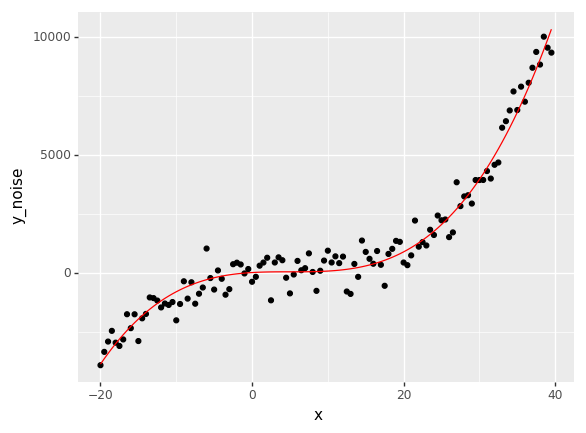

<ggplot: (128960364243)>

In [3]:
(ggplot(sample_data)
 + aes(x = 'x', y = 'y_noise')
 + geom_point()
 + geom_line(aes(y ='y'), color ='red')
)

# Model

In [8]:
X_train = np.array(sample_data['x']).reshape(-1, 1)
y_train = np.array(sample_data['y_noise']).reshape(-1, 1)

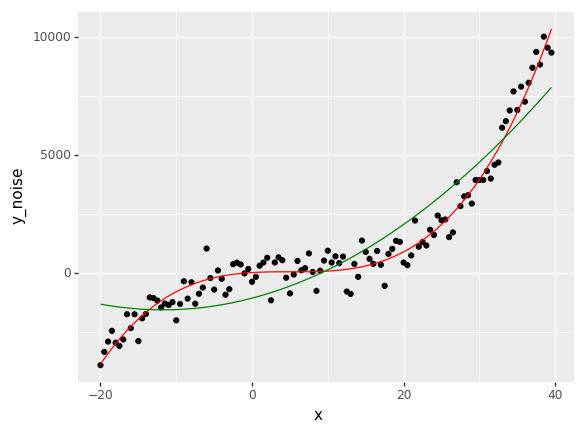

<ggplot: (128961008518)>

In [31]:
# prepare the features
degree = 2
poly_feat = PolynomialFeatures(degree=degree)
x_poly = poly_feat.fit_transform(X_train)

# fit the model
model = LinearRegression()
model.fit(x_poly, y_train)

# create predictions
sample_data['y_poly_pred'] = model.predict(x_poly)

# visualise results
(ggplot(sample_data)
 + aes(x = 'x', y = 'y_noise')
 + geom_point()
 + geom_line(aes(y ='y'), color ='red')
 + geom_line(aes(y ='y_poly_pred'), color='green')
)

In [32]:
r2 = r2_score(sample_data['y_noise'], sample_data['y_poly_pred'])
r2

0.8648818123617951

## Adjusted $R^2$

calculate adjusted R2 which is better suitable (cost for too many parameters)

$R^2=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [33]:
p = degree  # nr of independent variables
n = sample_data.shape[0]  # nr of observations
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
adj_r2

0.862572099752595